# **Correlation and regression analysis**

**Task: Perform exploratory data analysis (EDA) and gain insights from the Google Play Store Apps dataset.
The Google Play Store Apps dataset contains information about various mobile apps available on the Google Play Store, including attributes like the app category, size, rating, reviews, and more. My task is to perform exploratory data analysis to understand the characteristics and trends within the dataset and extract meaningful insights.
Here are the steps you can follow for performing EDA on the Google Play Store Apps dataset:**

# **Step 1**
**Load the dataset into a Pandas DataFrame and examine its structure and contents**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science Internship/week_2/Day_2/googleplaystore.csv")

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Category']=df['Category'].str.replace("1.9","NA")
# After replacing the value at index 10472
df.iloc[10472]

<ipython-input-28-a9ad0c72eba2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Category']=df['Category'].str.replace("1.9","NA")


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                               NA
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [ ]:
# Check column names, data types, and missing values
# print(df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Step 2**
**Explore the distribution of variables, such as app categories, ratings, and reviews, using descriptive statistics and visualizations. You can utilize libraries like Matplotlib, Seaborn, or Plotly for data visualization.**

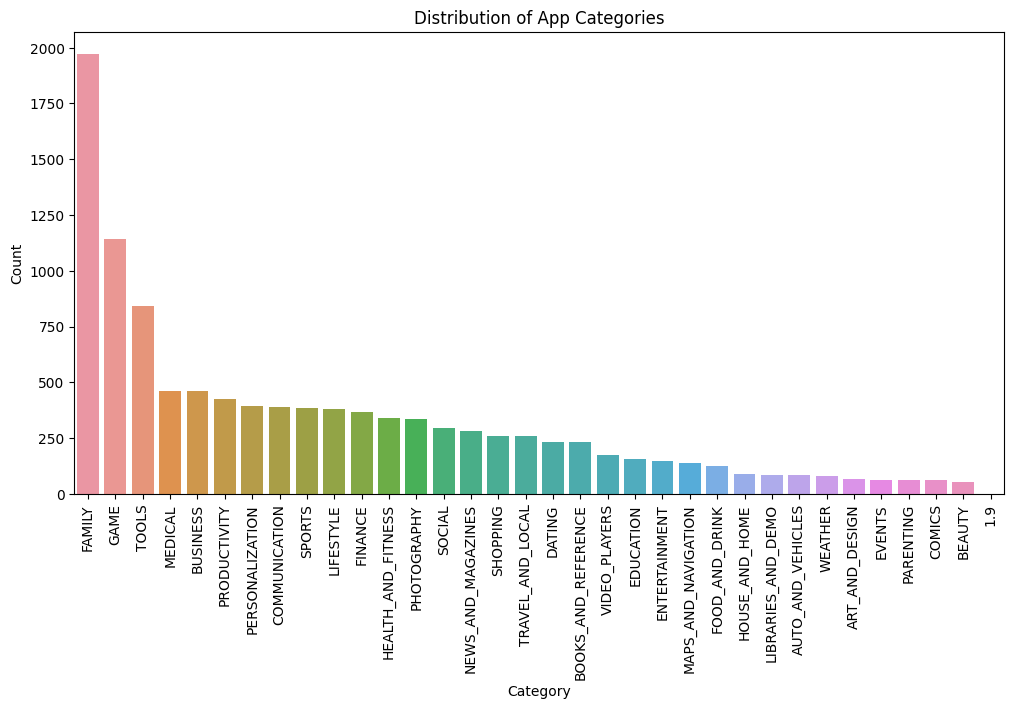

In [ ]:
category_counts = df['Category'].value_counts()
# print(category_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of App Categories')
plt.show()

In [ ]:
# Calculate descriptive statistics for app ratings
print(df['Rating'].describe())

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64


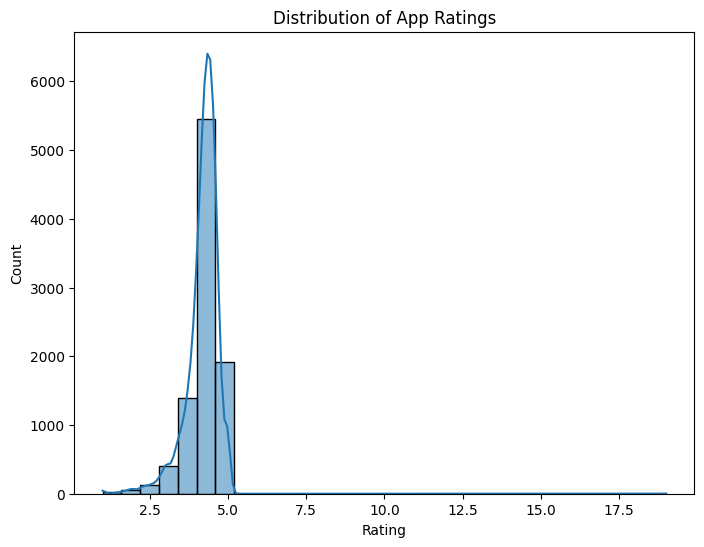

In [ ]:
# Create a histogram to visualize the distribution of app ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of App Ratings')
plt.show()

# **Step 3**
**Investigate the relationship between different features. For example, you can analyze the correlation between the number of installs and app ratings or explore the impact of app size on user reviews.**

<Axes: xlabel='Installs', ylabel='Rating'>

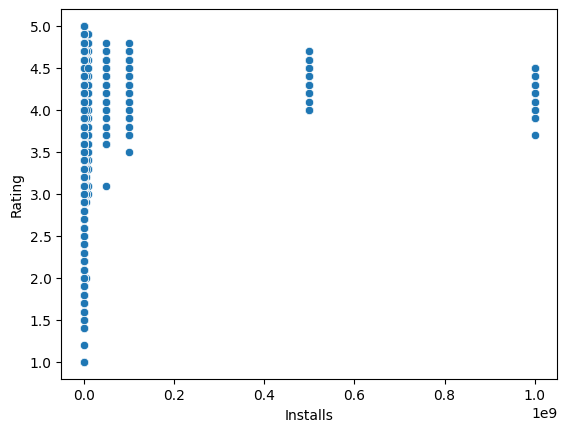

In [ ]:
sns.scatterplot(x='Installs',y='Rating',data=df)

<Axes: xlabel='Size', ylabel='Reviews'>

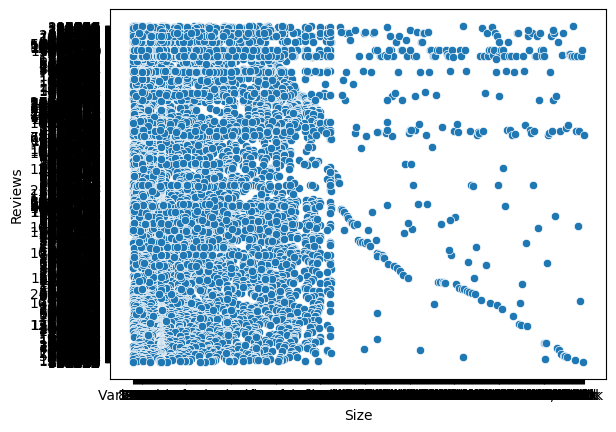

In [ ]:
sns.scatterplot(x='Size',y='Reviews',data=df)

**Identify the most popular app categories and visualize their distribution using bar charts or pie charts.**

In [ ]:
# Identify the most popular app categories
top_categories = df["Category"].value_counts().sort_values(ascending=False).head(10)
print(top_categories)

FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64


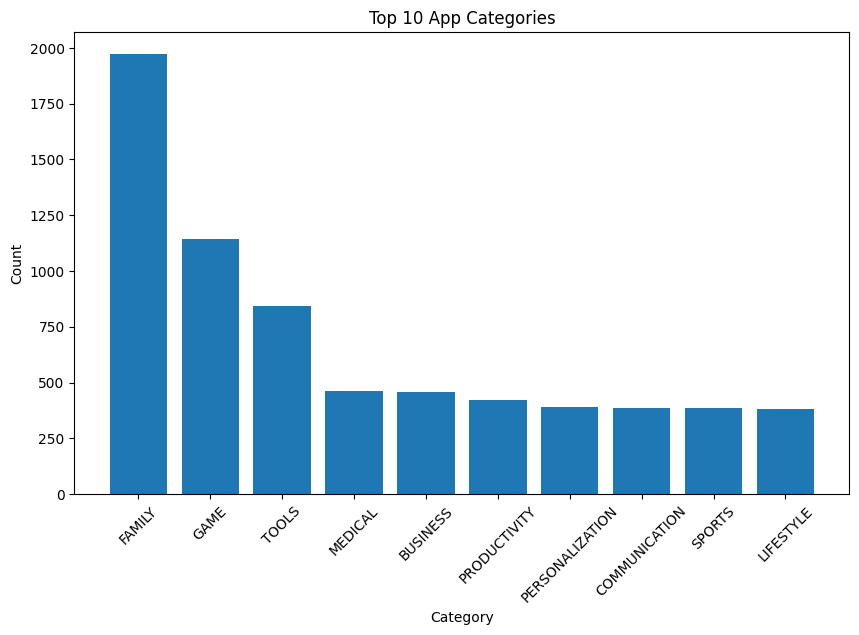

In [ ]:
# Create a bar chart to visualize the distribution of top categories
num_top_categories = 10
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title(f'Top {num_top_categories} App Categories')
plt.xticks(rotation=45)
plt.show()

**Perform data cleaning and preprocessing if necessary. Handle missing values, duplicate entries, or inconsistent data to ensure the quality of your analysis.**





In [ ]:
# Handle missing values
df.dropna(inplace=True)

In [ ]:
# Handle duplicate entries
df.drop_duplicates(inplace=True)

**Cleaning the Install Column**

In [ ]:
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8886, dtype: float64

In [73]:
# Handle inconsistent data

# Clean the 'Installs' column
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').astype(int)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8886, dtype: int64

**Cleaning the Size Column**

In [74]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

In [75]:
# Clean the 'Size' column
df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '')
df['Size'] = df['Size'].replace('Varies with device', 0)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [77]:
df['Size'].astype(int)

0        19
1        14
2         8
3        25
4         2
         ..
10834     2
10836    53
10837     3
10839     0
10840    19
Name: Size, Length: 8886, dtype: int64

**Cleaning the Price Column**

In [78]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 8886, dtype: object

In [82]:
# cleaning the price column
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype(int)

In [83]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Extract insights from the dataset. For instance, you can determine which app categories tend to have higher ratings, identify the most significant factors influencing app popularity, or explore any interesting trends within the data.**

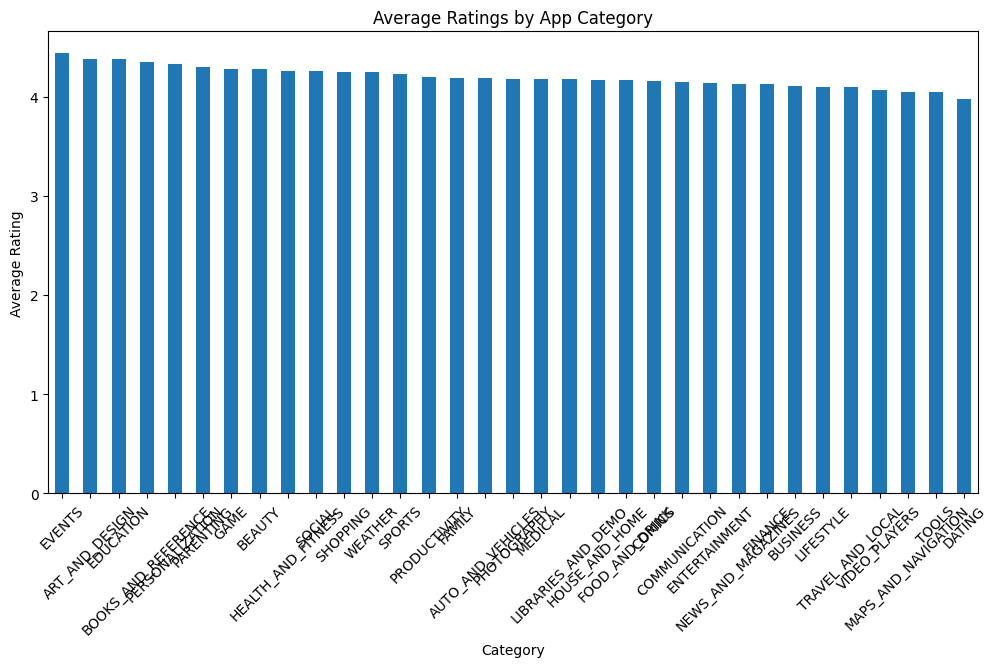

In [86]:
# Determine app categories with higher ratings
category_avg_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Visualize the average ratings by app category
plt.figure(figsize=(12, 6))
category_avg_ratings.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings by App Category')
plt.xticks(rotation=45)
plt.show()


In [87]:
# Summarize the findings
print("The most popular app categories are:", top_categories)
print("The average rating for apps in the Education category is:", df[df["Category"] == "Education"]["Rating"].mean())
print("The number of installs correlates with app rating, but there is a lot of variation.")
print("The distribution of app reviews is skewed towards positive reviews.")

The most popular app categories are: FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64
The average rating for apps in the Education category is: nan
The number of installs correlates with app rating, but there is a lot of variation.
The distribution of app reviews is skewed towards positive reviews.
